## MSI from CRSP via WRDS
- msi: Monthly Stock Index
- Link for CRSP at WRDS: https://wrds-www.wharton.upenn.edu/pages/about/data-vendors/center-for-research-in-security-prices-crsp/

-------------------------

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wrds
pd.set_option('display.max_columns', None)

### Connect WRDS

In [3]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download msi data

In [4]:
df= conn.get_table(library='crsp', table='msi')
print(df.shape)
df.head(2)

(1156, 11)


,date,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx,totval,totcnt,usdval,usdcnt
0,1925-12-31,NaN,NaN,NaN,NaN,NaN,12.46,27487487.2,503.0,NaN,NaN
1,1926-01-30,0.000561,-0.001395,0.023174,0.021395,0.022472,12.74,27624240.8,506.0,27412916.2,496.0


In [5]:
df.tail(2)

,date,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx,totval,totcnt,usdval,usdcnt
1154,2022-02-28,-0.022027,-0.023310,-0.007667,-0.008624,-0.031361,4373.94,5.801772e+10,8895.0,5.921860e+10,8802.0
1155,2022-03-31,0.030696,0.029129,0.015438,0.013759,0.035773,4530.41,5.971696e+10,8917.0,5.794328e+10,8854.0


In [6]:
df['date']= pd.to_datetime(df.date)
df['year']= df.date.dt.year
df.set_index('date', inplace= True)

-----------

## Inspection with visualization since 1926

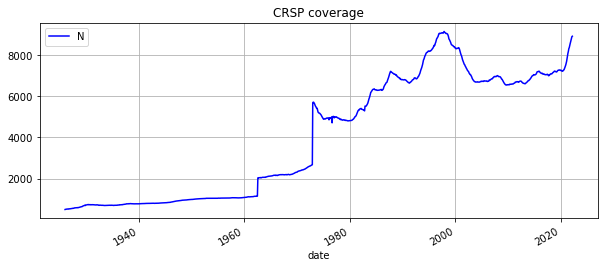

In [7]:
df[['totcnt']].plot(kind='line', figsize=(10,4), grid= True, color='b', title="CRSP coverage")
plt.legend("N")
plt.show()

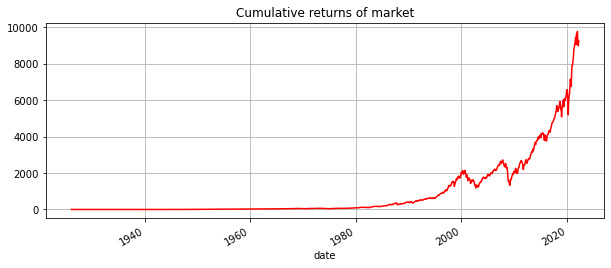

In [8]:
(1+df['vwretd']).cumprod().plot(kind='line', figsize=(10,4), grid= True, color='r', title= "Cumulative returns of market")
plt.show()

## Inspection with visualization since 1995

In [9]:
df_recent= df[df.year>=1990]

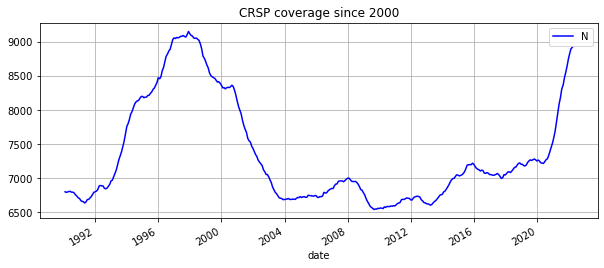

In [10]:
df_recent[['totcnt']].plot(kind='line', figsize=(10,4), grid= True, color='b', title="CRSP coverage since 2000")
plt.legend("N")
plt.show()

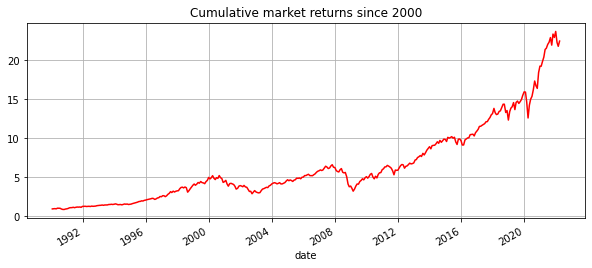

In [11]:
(1+df_recent['vwretd']).cumprod().plot(kind='line', figsize=(10,4), grid= True, color='r', title= "Cumulative market returns since 2000")
plt.show()

## Inspection with visualization for 1995 ~ 2012 (including Dotcom bubble and global financial crisis)

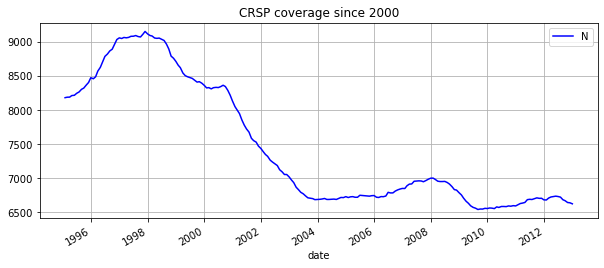

In [12]:
df_1995_2012= df[(df.year>=1995) & (df.year<=2012)]
df_1995_2012[['totcnt']].plot(kind='line', figsize=(10,4), grid= True, color='b', title="CRSP coverage since 2000")
plt.legend("N")
plt.show()

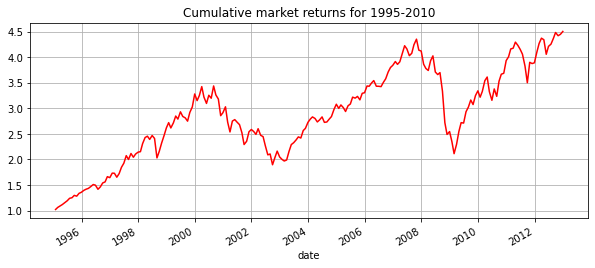

In [13]:
(1+df_1995_2012['vwretd']).cumprod().plot(kind='line', figsize=(10,4), grid= True, color='r', title= "Cumulative market returns for 1995-2010")
plt.show()

-----------

### Close connection

In [14]:
conn.close()

---------